In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tushare as ts
warnings.filterwarnings("ignore")

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [39]:
code = '601865'
# GFGF = ts.get_hist_data(ticket)
DetailINFO = ts.get_hist_data(code, '2019-01-01', '2020-12-31')
DetailINFO.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-10-28,36.30,37.97,36.40,35.87,204724.47,-0.74,-1.99,34.874,35.208,32.881,183230.02,217313.82,190986.76,6.00
2020-10-27,34.05,37.88,37.14,33.71,215356.88,2.64,7.65,34.234,35.514,32.281,192854.59,230045.15,185268.28,6.32
2020-10-26,32.60,34.80,34.50,32.38,182237.92,1.50,4.54,33.596,35.600,31.695,208465.78,245549.62,178637.59,5.34
2020-10-23,33.40,33.88,33.00,32.00,120182.93,-0.33,-0.99,33.662,35.770,31.227,203560.70,237774.71,174327.36,3.52
2020-10-22,32.50,33.74,33.33,31.23,193647.88,0.13,0.39,34.802,35.761,30.841,229609.98,227577.68,176230.26,5.68


In [40]:
DetailINFO = DetailINFO.iloc[:,:5].sort_index()
DetailINFO.index = pd.to_datetime(DetailINFO.index, format = '%Y-%m-%d')
DetailINFO.head()

,open,high,close,low,volume
date,,,,,
2019-02-15,2.88,2.88,2.88,2.88,1124.48
2019-02-18,3.17,3.17,3.17,3.17,543.54
2019-02-19,3.49,3.49,3.49,3.49,1053.76
2019-02-20,3.84,3.84,3.84,3.84,826.00
2019-02-21,4.22,4.22,4.22,4.22,4205.55


In [41]:
df1 = DetailINFO
df1

,open,high,close,low,volume
date,,,,,
2019-02-15,2.88,2.88,2.88,2.88,1124.48
2019-02-18,3.17,3.17,3.17,3.17,543.54
2019-02-19,3.49,3.49,3.49,3.49,1053.76
2019-02-20,3.84,3.84,3.84,3.84,826.00
2019-02-21,4.22,4.22,4.22,4.22,4205.55
...,...,...,...,...,...
2020-10-22,32.50,33.74,33.33,31.23,193647.88
2020-10-23,33.40,33.88,33.00,32.00,120182.93
2020-10-26,32.60,34.80,34.50,32.38,182237.92


Text(0, 0.5, 'Close Price')

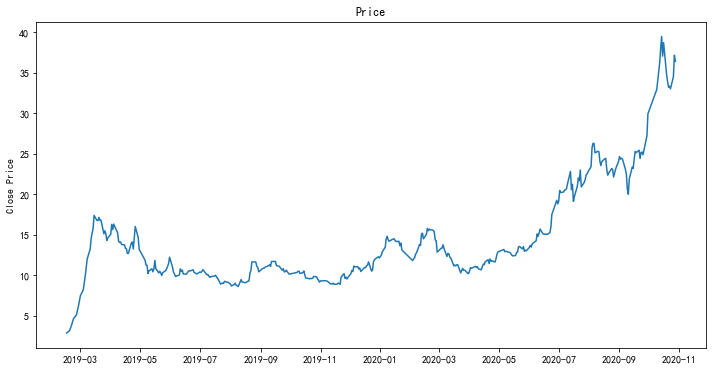

In [42]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df1['close'])
plt.title('Price')
plt.ylabel('Close Price')
# plt.legend(loc = 'upper left')

In [43]:
ndate = len(df1)
ndate

414

In [44]:
periodHigh = pd.Series(np.zeros(ndate - 8), index = df1.index[8:])
periodLow = pd.Series(np.zeros(ndate - 8), index = df1.index[8:])

In [45]:
RSV = pd.Series(np.zeros(ndate - 8), index = df1.index[8:])
RSV.head()

date
2019-02-27    0.0
2019-02-28    0.0
2019-03-01    0.0
2019-03-04    0.0
2019-03-05    0.0
dtype: float64

In [46]:
close = df1.close
high = df1.high
low = df1.low
date = close.index.to_series()

In [47]:
date[date.index.duplicated()]

Series([], Name: date, dtype: datetime64[ns])

In [48]:
for j in range(3, ndate):
    period = date[j-3:j+1]
    i = date[j]
    periodHigh[i] = high[period].max()
    periodLow[i] = low[period].min()
    RSV[i] = 100*(close[i] - periodLow[i]) / (periodHigh[i] - periodLow[i])
    periodHigh.name = 'periodHigh'
    periodLow.name = 'periodLow'
    RSV.name = 'RSV'

In [49]:
RSV.head()

date
2019-02-27    100.0
2019-02-28    100.0
2019-03-01    100.0
2019-03-04    100.0
2019-03-05    100.0
Name: RSV, dtype: float64

In [50]:
periodHigh.head(3)
periodLow.head(3)
RSV.head(3)

date
2019-02-27    100.0
2019-02-28    100.0
2019-03-01    100.0
Name: RSV, dtype: float64

In [51]:
RSV['2020'].head()

date
2020-01-02    62.184874
2020-01-03    86.538462
2020-01-06    80.898876
2020-01-07    93.774319
2020-01-08    88.973384
Name: RSV, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000228468B2940>,
      dtype=object)

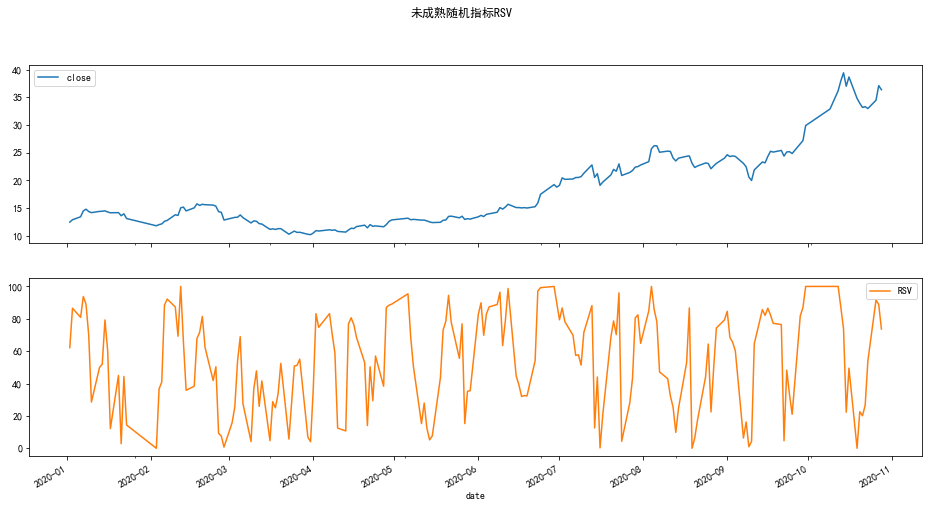

In [52]:
plt.rcParams['font.sans-serif'] = ['SimHei']
close1=close['2020']
RSV1=RSV['2020']
C1_RSV=pd.DataFrame([close1, RSV1]).transpose()
C1_RSV.plot(subplots = True, title = '未成熟随机指标RSV', figsize = (16, 8))

In [53]:
RSV1 = pd.Series([50, 50], index = date[1:3]).append(RSV)
RSV1.name = 'RSV'
RSV1.head()

date
2019-02-18     50.0
2019-02-19     50.0
2019-02-27    100.0
2019-02-28    100.0
2019-03-01    100.0
Name: RSV, dtype: float64

In [54]:
KValue = pd.Series(0.0, index = RSV1.index)
KValue[0] = 50
for i in range(1, len(RSV1)):
    KValue[i] = 2/3*KValue[i-1] + RSV1[i]/3
KValue.name = 'KValue'
KValue.head()  

date
2019-02-18    50.000000
2019-02-19    50.000000
2019-02-27    66.666667
2019-02-28    77.777778
2019-03-01    85.185185
Name: KValue, dtype: float64

In [55]:
DValue = pd.Series(0.0, index = RSV1.index)
DValue[0] = 50
for i in range(1, len(RSV1)):
    DValue[i] = 2/3*DValue[i-1] + KValue[i]/3
KValue = KValue[1:]
DValue.name = 'DValue'
DValue = DValue[1:]
DValue.head()   

date
2019-02-19    50.000000
2019-02-27    55.555556
2019-02-28    62.962963
2019-03-01    70.370370
2019-03-04    76.954733
Name: DValue, dtype: float64

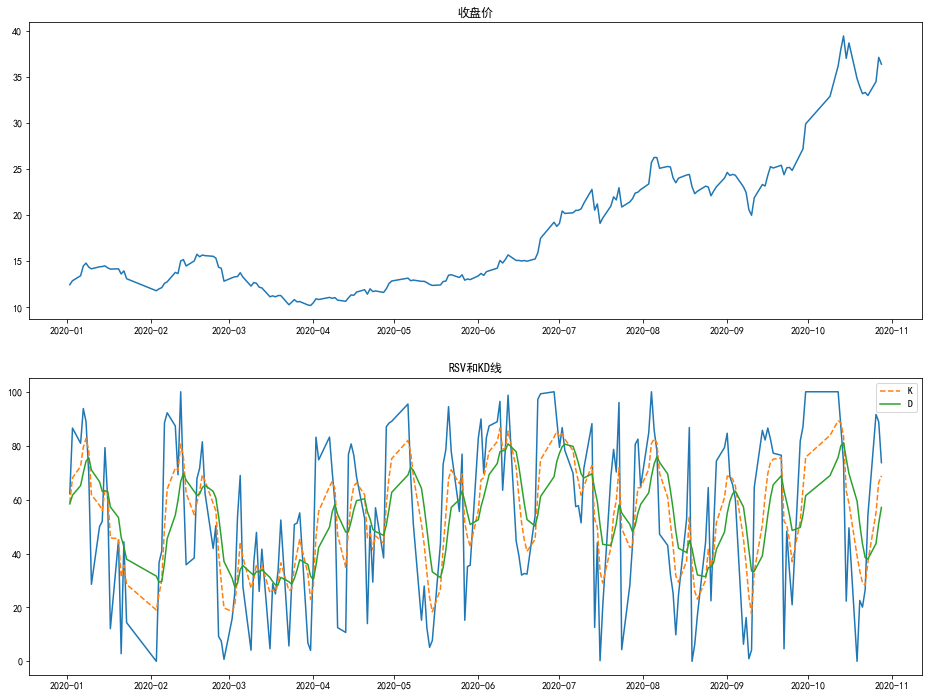

In [56]:
plt.figure(figsize=(16, 12))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.subplot(211)
plt.title('收盘价')
plt.plot(close['2020'])
plt.subplot(212)
plt.title('RSV和KD线')
plt.plot(RSV['2020'])
plt.plot(KValue['2020'], linestyle = 'dashed', label = 'K')
plt.plot(DValue['2020'], linestyle = '-', label = 'D')
plt.legend(loc = 'best')

In [57]:
date[date.index.duplicated()]
KValue

date
2019-02-19    50.000000
2019-02-27    66.666667
2019-02-28    77.777778
2019-03-01    85.185185
2019-03-04    90.123457
                ...    
2019-02-20    79.210129
2019-02-21    86.140086
2019-02-22    90.760057
2019-02-25    93.840038
2019-02-26    95.893359
Name: KValue, Length: 412, dtype: float64

In [58]:
data = pd.DataFrame()
data['close'] = close
data['sma10'] = KValue
data['sma30'] = DValue
data.head()

,close,sma10,sma30
date,,,
2019-02-15,2.88,NaN,NaN
2019-02-18,3.17,NaN,NaN
2019-02-19,3.49,50.000000,50.000000
2019-02-20,3.84,79.210129,64.467799
2019-02-21,4.22,86.140086,71.691895


In [59]:
closedf = close.to_frame()
closedf.head()

,close
date,
2019-02-15,2.88
2019-02-18,3.17
2019-02-19,3.49
2019-02-20,3.84
2019-02-21,4.22


In [60]:
KValuedf = KValue.to_frame()
KValuedf.head()

,KValue
date,
2019-02-19,50.000000
2019-02-27,66.666667
2019-02-28,77.777778
2019-03-01,85.185185
2019-03-04,90.123457


In [61]:
DValuedf = DValue.to_frame()
DValuedf.head()

,DValue
date,
2019-02-19,50.000000
2019-02-27,55.555556
2019-02-28,62.962963
2019-03-01,70.370370
2019-03-04,76.954733


In [85]:
data = pd.DataFrame()
data['close'] = closedf['close']
data['k'] = KValuedf['KValue']
data['d'] = DValuedf['DValue']
data.tail(60)

,close,k,d
date,,,
2020-07-29,22.41,55.225629,50.447251
2020-07-30,22.51,64.296761,55.063754
2020-07-31,22.79,64.465384,58.197631
2020-08-03,23.40,71.266397,62.553886
2020-08-04,25.74,80.844264,68.650679
2020-08-05,26.28,82.486962,73.262773
2020-08-06,26.26,81.037192,75.854246
2020-08-07,25.10,69.748065,73.818853
2020-08-10,25.30,60.837630,69.491778


In [63]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    param = 0
    # 止损指标
    param2 = 1.15
    for i in range(len(data)):
        if data['k'][i] * param2 > data['d'][i]:
            if flag != 1:
                sigPriceBuy.append(data['close'][i - param])
                sigPriceSell.append(np.nan)
                flag = 1
            else :
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['k'][i] * param2 < data['d'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['close'][i - param])
                flag = 0
            else :
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else :
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

In [64]:
buy_sell = buy_sell(data)
data['Buy'] = buy_sell[0]
data['Sell'] = buy_sell[1]
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 414 entries, 2019-02-15 to 2020-10-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   414 non-null    float64
 1   k       412 non-null    float64
 2   d       412 non-null    float64
 3   Buy     42 non-null     float64
 4   Sell    41 non-null     float64
dtypes: float64(5)
memory usage: 39.4 KB


In [65]:
data[data['Buy'].notna()].head()

,close,k,d,Buy,Sell
date,,,,,
2019-02-19,3.49,50.000000,50.000000,3.49,NaN
2019-03-29,14.60,28.615889,31.554289,14.60,NaN
2019-04-16,13.32,26.961771,27.353237,13.32,NaN
2019-04-22,13.98,46.829634,31.416361,13.98,NaN
2019-05-10,10.53,23.399799,25.475018,10.53,NaN


In [66]:
data[data['Sell'].notna()].head()

,close,k,d,Buy,Sell
date,,,,,
2019-03-21,16.77,58.294527,72.762900,NaN,16.77
2019-04-09,14.20,34.801160,47.420083,NaN,14.20
2019-04-18,12.68,20.465685,25.442362,NaN,12.68
2019-04-30,13.19,43.760920,53.877255,NaN,13.19
2019-05-21,10.49,36.012909,42.715461,NaN,10.49


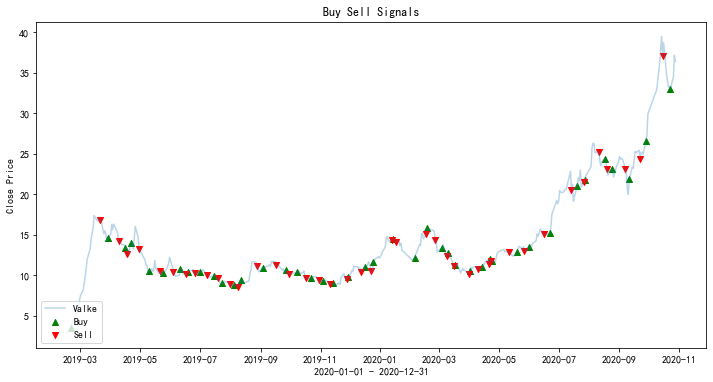

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(df1['close'], label = 'Valke', alpha = 0.3)
plt.scatter(data.index,data['Buy'], label='Buy', marker = "^", color = 'green')
plt.scatter(data.index,data['Sell'], label='Sell', marker = "v", color = 'red')
plt.title('Buy Sell Signals')
plt.xlabel('2020-01-01 - 2020-12-31')
plt.ylabel('Close Price')
plt.legend(loc = 'lower left')

In [77]:
dfresult = data[(pd.notna(data.Buy) | pd.notna(data.Sell))]
dfresult.tail(50)

,close,k,d,Buy,Sell
date,,,,,
2019-10-30,9.38,25.532309,36.082424,NaN,9.38
2019-11-04,9.31,28.638707,28.048335,9.31,NaN
2019-11-11,8.95,28.498032,34.336452,NaN,8.95
2019-11-14,9.03,34.049677,30.629476,9.03,NaN
2019-11-28,9.54,48.899843,56.516935,NaN,9.54
2019-11-29,9.75,52.787688,55.273853,9.75,NaN
2019-12-12,10.46,38.368111,52.632603,NaN,10.46
2019-12-16,10.96,47.983425,46.972809,10.96,NaN
2019-12-23,10.52,48.915474,60.357884,NaN,10.52


In [69]:
dfresult['newcol'] = dfresult.Sell.shift(-1)
dfresult.head()

,close,k,d,Buy,Sell,newcol
date,,,,,,
2019-02-19,3.49,50.000000,50.000000,3.49,NaN,16.77
2019-03-21,16.77,58.294527,72.762900,NaN,16.77,NaN
2019-03-29,14.60,28.615889,31.554289,14.60,NaN,14.20
2019-04-09,14.20,34.801160,47.420083,NaN,14.20,NaN
2019-04-16,13.32,26.961771,27.353237,13.32,NaN,12.68


In [74]:
dfresult = dfresult[(pd.isna(dfresult.Sell))]
dfresult.tail(20)

,close,k,d,Buy,Sell,newcol,pct
date,,,,,,,
2020-01-14,14.44,55.879826,63.035349,14.44,NaN,14.16,-0.019391
2020-02-05,12.15,30.254785,29.662163,12.15,NaN,15.05,0.238683
2020-02-18,15.77,58.835719,61.584550,15.77,NaN,14.37,-0.088776
2020-03-04,13.35,31.781610,28.953762,13.35,NaN,12.32,-0.077154
2020-03-10,12.70,30.258439,31.927648,12.70,NaN,11.16,-0.121260
2020-03-17,11.26,26.503386,29.568020,11.26,NaN,10.21,-0.093250
2020-04-01,10.50,27.598745,30.276602,10.50,NaN,10.79,0.027619
2020-04-14,11.04,48.811499,48.229194,11.04,NaN,11.44,0.036232
2020-04-22,12.02,47.338196,52.774127,12.02,NaN,11.72,-0.024958


In [71]:
dfresult['pct'] = (dfresult.newcol - dfresult.Buy) / dfresult.Buy
dfresult.count()

close     42
k         42
d         42
Buy       42
Sell       0
newcol    41
pct       41
dtype: int64

In [72]:
# dfresult['pct'].to_list()

In [73]:
print ("起始金额")
plus = 0
minus = 0
start = 100000
print (start)

for i in dfresult['pct'].to_list()[:-1]:
  if i < 0:
#     print (1 + i)
    start = start * (1 + i)
    print ("当前亏损，亏损%0.2f 当前本金是%0.2f" % (1+i, start))
    minus += 1
  else :
#     print (1 + i)
    start = start * (1 + i)
    print ("当前盈利，盈利%0.2f 当前本金是%0.2f" % (1+i, start))
    plus += 1
  i = 0
  
print ("策略后金额")
print ("%0.2f" % (start))
var2 = ((start-100000)/100000)*100
print ("累就收益%0.2f%% " % (var2))
print ("累计胜负 胜%d，负%d" % (plus, minus))

起始金额
100000
当前盈利，盈利4.81 当前本金是480515.76
当前亏损，亏损0.97 当前本金是467350.94
当前亏损，亏损0.95 当前本金是444895.64
当前亏损，亏损0.94 当前本金是419754.90
当前亏损，亏损1.00 当前本金是418160.39
当前盈利，盈利1.01 当前本金是421405.09
当前亏损，亏损0.94 当前本金是395628.69
当前亏损，亏损0.98 当前本金是389198.78
当前亏损，亏损0.97 当前本金是375739.45
当前亏损，亏损0.98 当前本金是366630.62
当前亏损，亏损0.99 当前本金是362174.33
当前亏损，亏损0.97 当前本金是351546.19
当前盈利，盈利1.17 当前本金是412862.39
当前盈利，盈利1.03 当前本金是426954.56
当前亏损，亏损0.95 当前本金是406872.03
当前亏损，亏损0.93 当前本金是379354.11
当前亏损，亏损0.98 当前本金是369889.98
当前亏损，亏损0.96 当前本金是355587.04
当前盈利，盈利1.06 当前本金是375670.02
当前盈利，盈利1.07 当前本金是403026.51
当前亏损，亏损0.96 当前本金是386846.61
当前盈利，盈利1.24 当前本金是478084.02
当前亏损，亏损0.98 当前本金是468813.69
当前盈利，盈利1.24 当前本金是580711.61
当前亏损，亏损0.91 当前本金是529158.27
当前亏损，亏损0.92 当前本金是488331.82
当前亏损，亏损0.88 当前本金是429116.78
当前亏损，亏损0.91 当前本金是389101.45
当前盈利，盈利1.03 当前本金是399848.06
当前盈利，盈利1.04 当前本金是414335.31
当前亏损，亏损0.98 当前本金是403994.17
当前盈利，盈利1.09 当前本金是439630.63
当前盈利，盈利1.01 当前本金是444778.53
当前盈利，盈利1.12 当前本金是500086.06
当前盈利，盈利1.35 当前本金是673772.57
当前盈利，盈利1.02 当前本金是688210.55
当前盈利，盈利1.16 当前本金